# **Churn Analysis**

**About the DATASET:**
Dataset with customer details, including a section identifying customers who discontinued their service in the previous month.

In [1]:
#import the required libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

**Load the data file**

In [2]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking types of columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Analyzing statistics of numerical variables, including measures like mean and standard deviation.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The 'Senior Citizen' attribute is categorical, so the 25%-50%-75% distribution is not meaningful.

Additionally, 75% of customers have a tenure of less than 55 months.

The average monthly charge is USD 64.76, while 25% of customers pay over USD 89.85 per month.

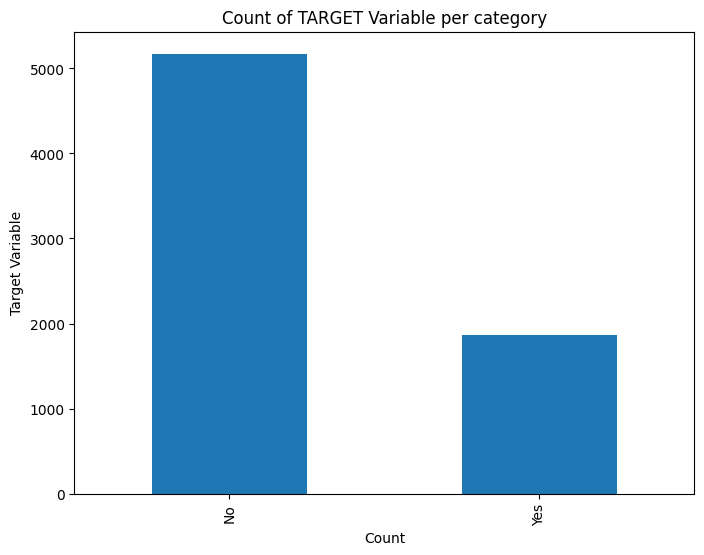

In [8]:
data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category");

In [9]:
100*data['Churn'].value_counts()/len(data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [10]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

* The dataset is highly imbalanced, with a ratio of 73:27.<br>
* To gain meaningful insights, we analyze the data alongside other features while considering the target values separately.

In [11]:
# Let's look at a concise summary of the dataframe. Since there are many columns, we use verbose=True for a detailed overview.
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning


**1.** Duplicate the original dataset to preserve the raw data while doing modifications and processing.

In [12]:
duplicate_data = data.copy()

**2.** 'Total Charges' should be a numeric value. Converting it to a numerical data type for proper analysis.

In [13]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** There are 11 missing values in the 'Total Charges' column. Let's identify and examine these records.

In [14]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

data.loc[data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since these records constitute only 0.15% of the dataset, it is reasonable to exclude them from further processing.

In [15]:
#Removing missing values
data.dropna(how = 'any', inplace = True)

#data.fillna(0)

**5.** Categorize customers into tenure bins (e.g., 1-12, 13-24 months, etc.) based on their tenure duration.

In [16]:
# Get the max tenure
print(data['tenure'].max()) #72

72


In [17]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [18]:
data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**6.** Remove unneccesary columns

In [19]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
**1.** Plot the distribution of individual features, separated by churn status, to identify patterns.

### Univariate Analysis

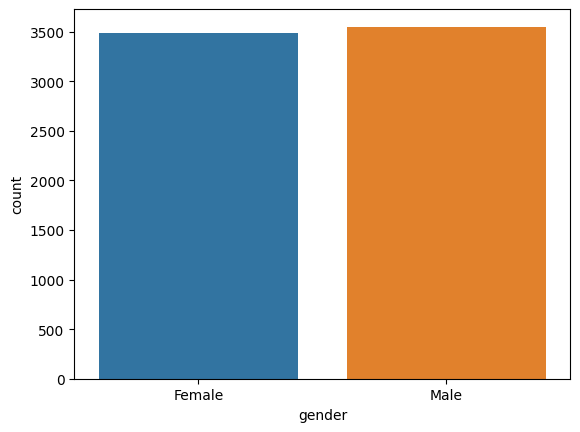

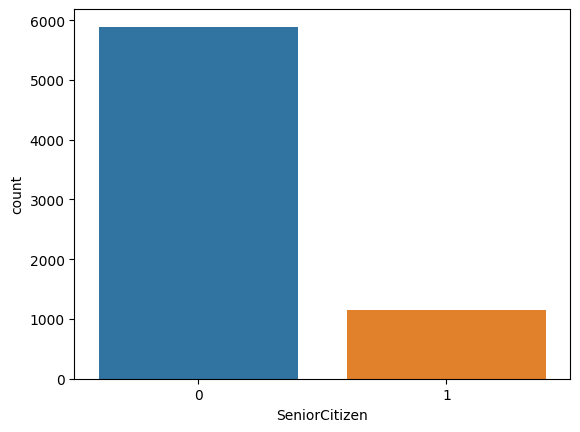

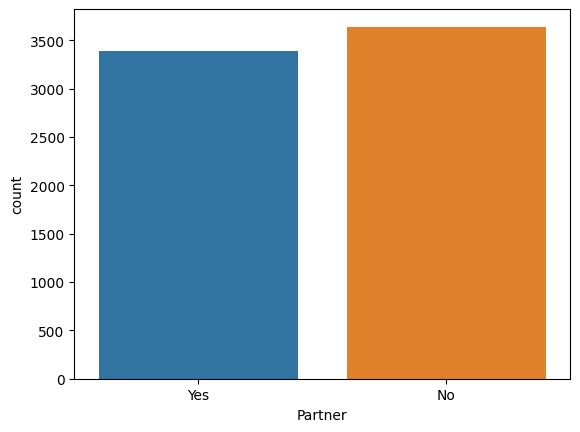

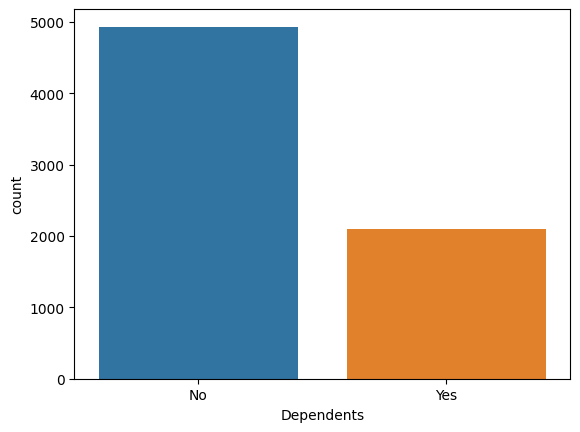

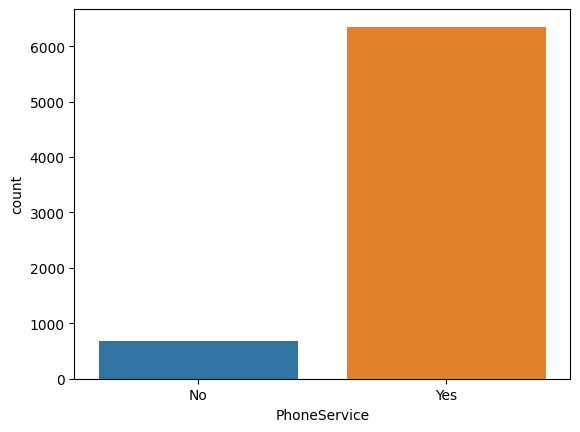

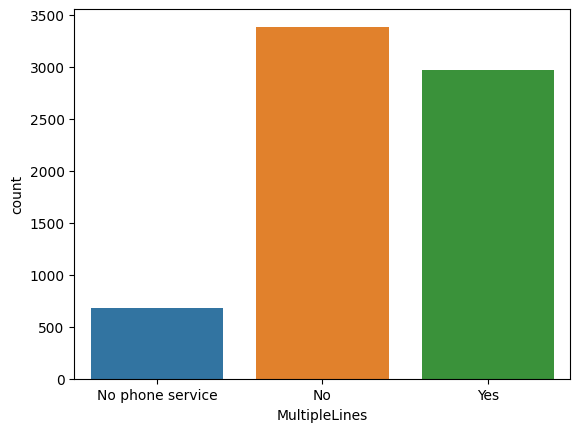

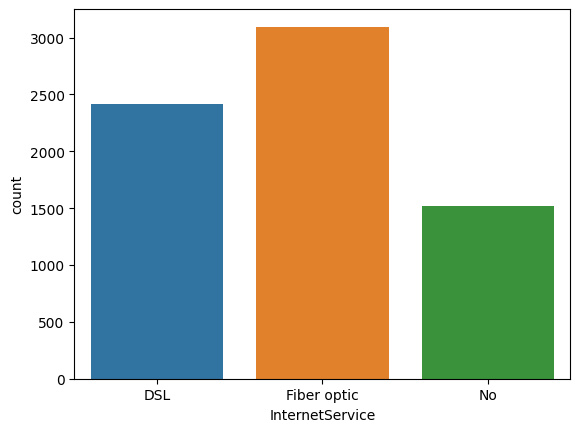

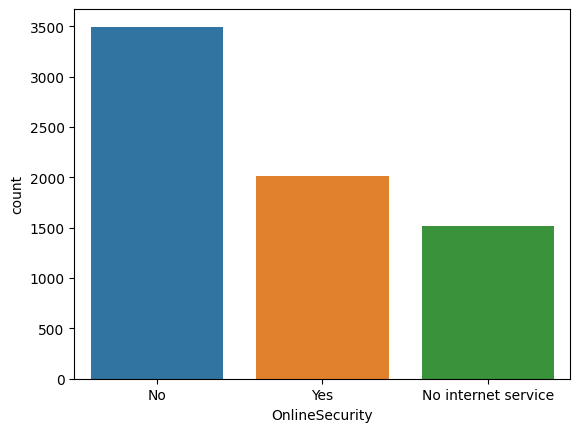

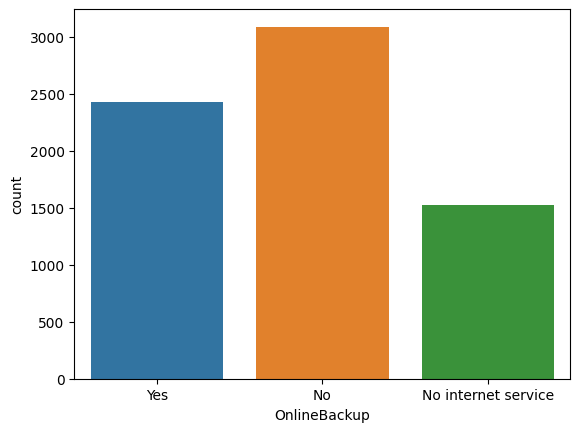

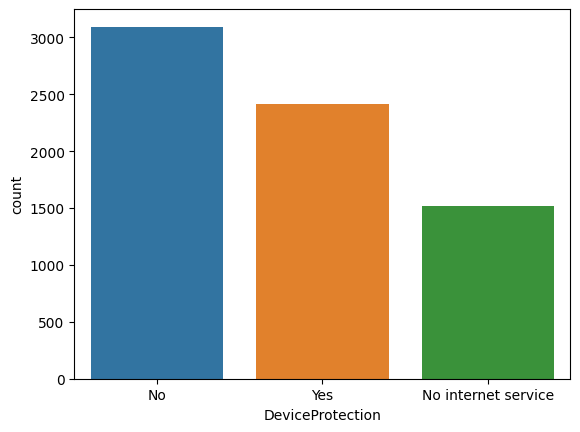

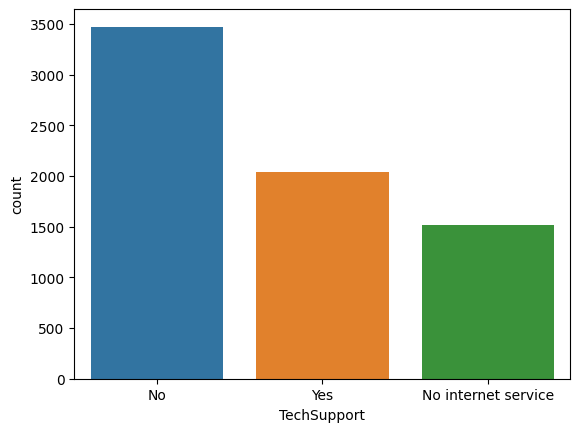

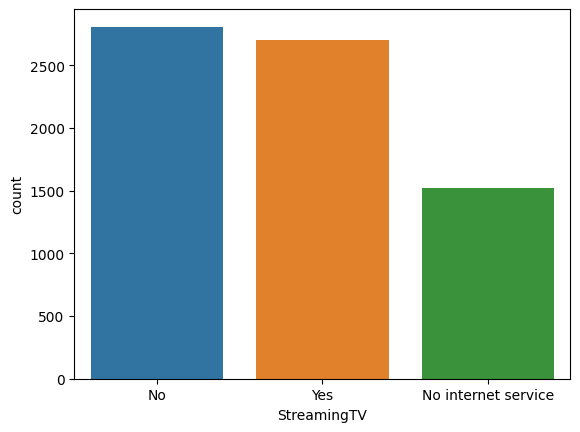

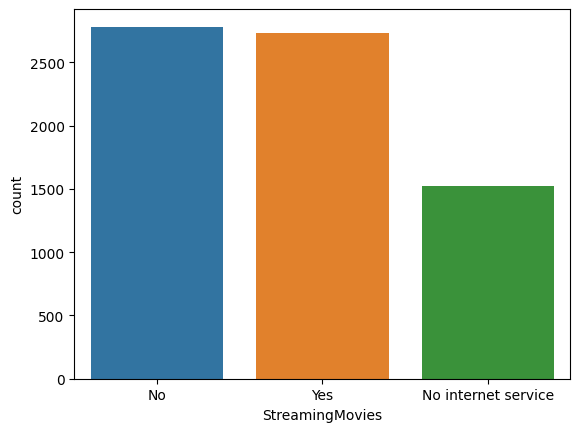

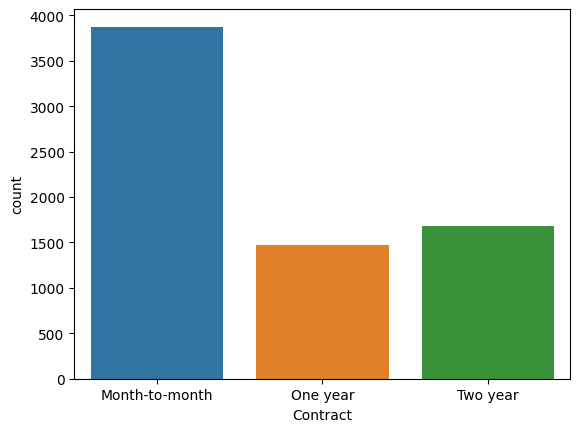

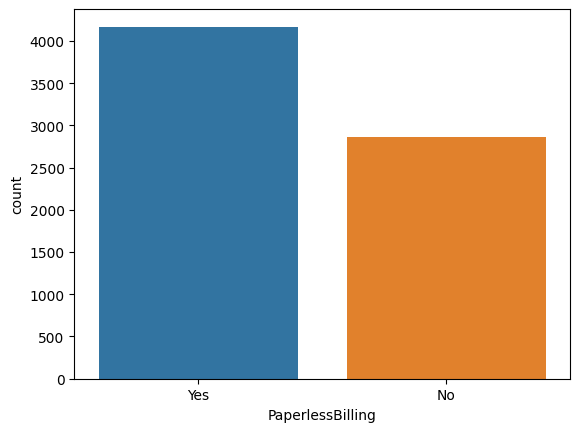

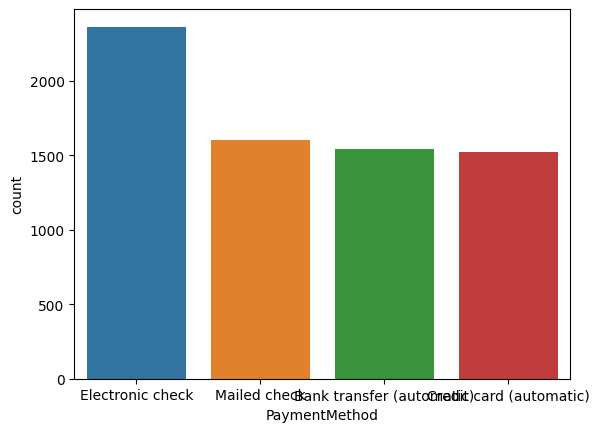

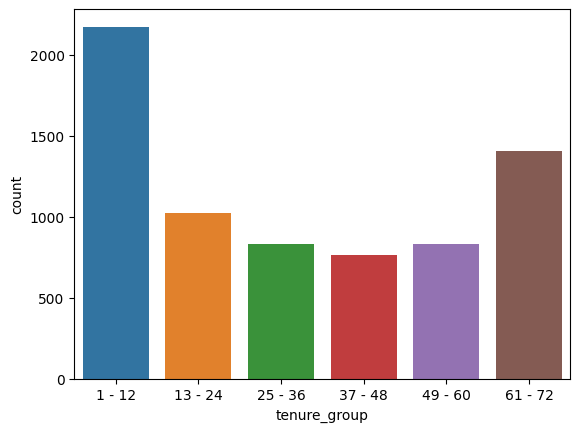

In [20]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor)

There is a high concentration of customers in their first year of tenure, followed by a decline in the mid-tenure range (13-60 months) and a spike at 61-72 months, possibly indicating higher retention or specific hiring patterns.

Electronic checks dominate as the preferred payment method, while mailed checks, bank transfers, and credit card payments have lower but evenly distributed usage. This suggests a strong preference for digital and automated payments.

StreamingTV subscriptions are fairly evenly split, though a smaller segment lacks internet service entirely, presenting potential growth opportunities for internet and streaming bundles.

Additional insights can be drawn from further analysis.

In [21]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [22]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Transform all categorical variables into dummy variables for analysis.

In [23]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


**9. ** Relationship between Monthly Charges and Total Charges

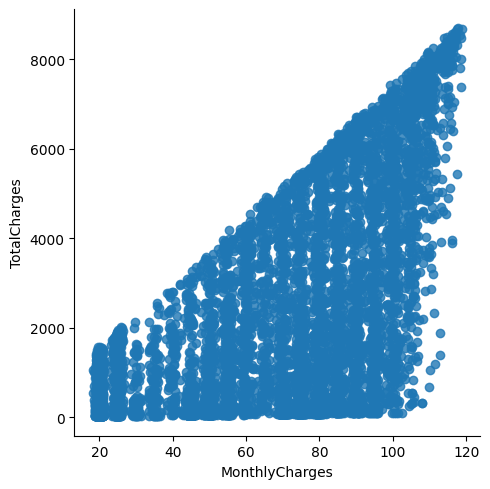

In [24]:
sns.lmplot(data=data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

'Total Charges' increase with 'Monthly Charges,' which aligns with expectations.

**10.** Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

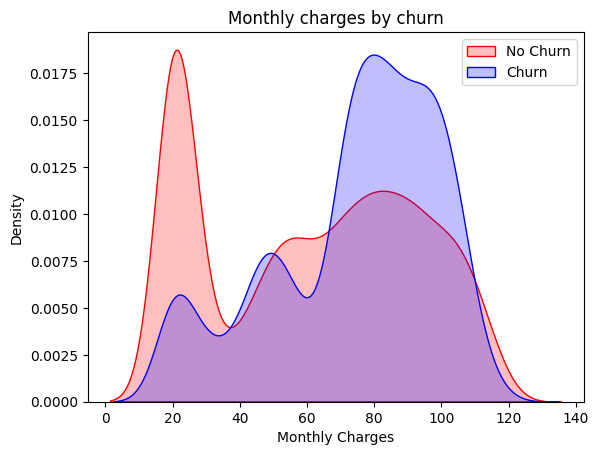

In [25]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

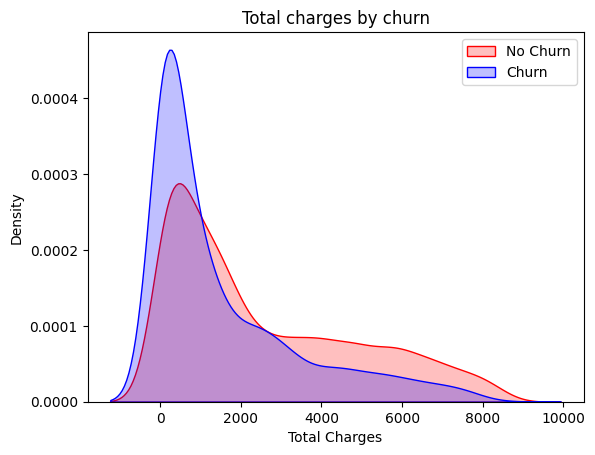

In [26]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight**: Higher churn is observed at lower total charges.

However, analyzing tenure, monthly charges, and total charges together clarifies this pattern— **higher monthly charges** at lower tenure lead to **lower total charges**. Thus, these three factors (**high monthly charge, low tenure, and low total charge**) are strongly linked to **high churn**.

**11.** Calculate the correlation of all predictors with 'Churn' to identify key influencing factors.

<Axes: >

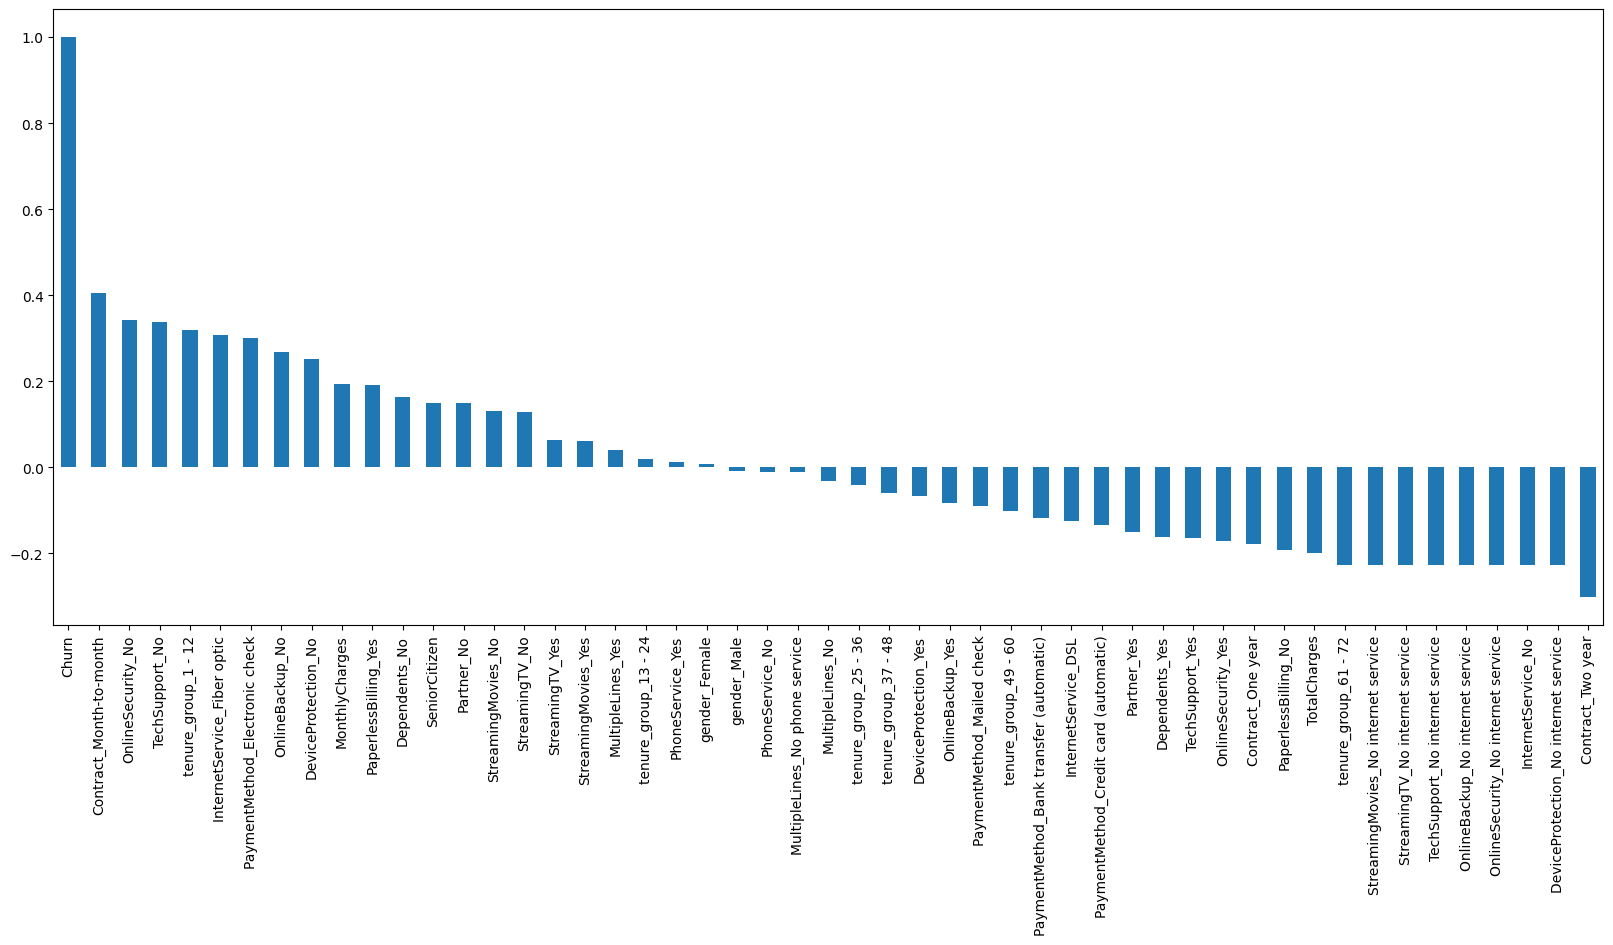

In [27]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

1. **High churn** is observed among customers with **month-to-month contracts, no online security, no tech support, first-year subscriptions, and fiber optics internet**.
2. **Low churn** is seen in **long-term contracts, subscriptions without internet service, and customers engaged for 5+ years**.
3. Factors like **gender, phone service availability, and the number of multiple lines** have **minimal impact** on churn.

This pattern is also reflected in the **heatmap** below.

### Bivariate Analysis

<Axes: >

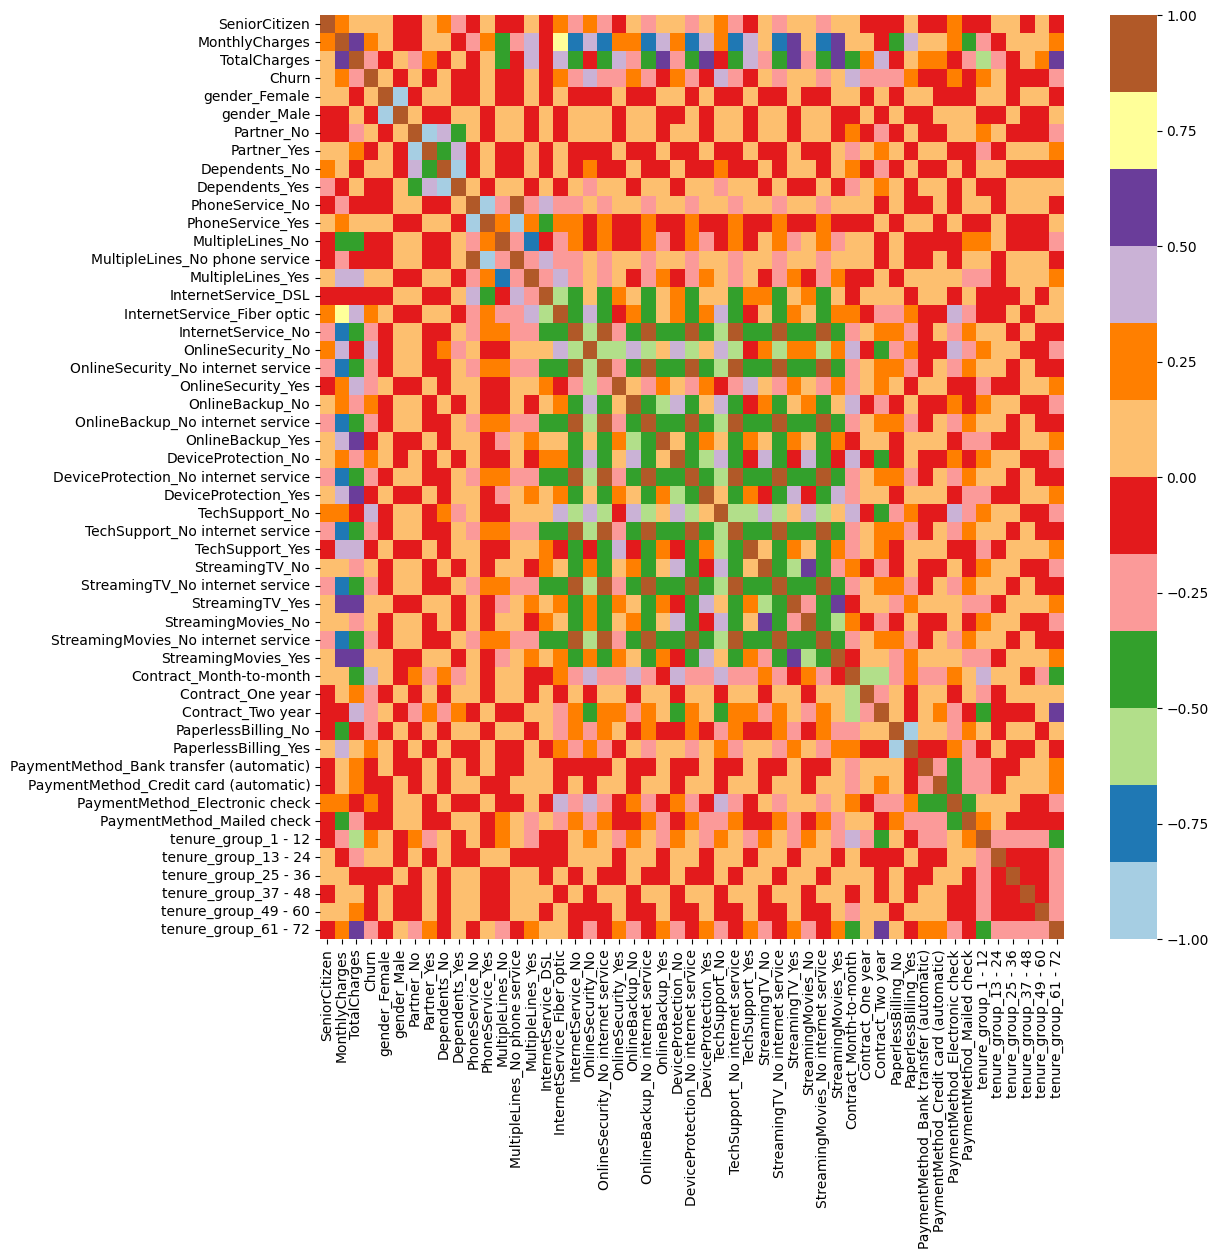

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

**Key Correlation Insights:**

1. **InternetService_Fiber optic & StreamingTV_Yes:** Positively correlated (orange/red), meaning customers with fiber optic internet are more likely to have streaming TV—likely due to higher internet speeds suited for streaming.

2. **Contract_Two year & Churn:** Negatively correlated (green/blue), indicating that customers with two-year contracts are less likely to churn, as longer commitments generally lead to higher retention.

3. **TechSupport_No & Churn:** Positively correlated (orange/red), showing that customers without tech support are more likely to churn, suggesting that tech support plays a role in customer retention.


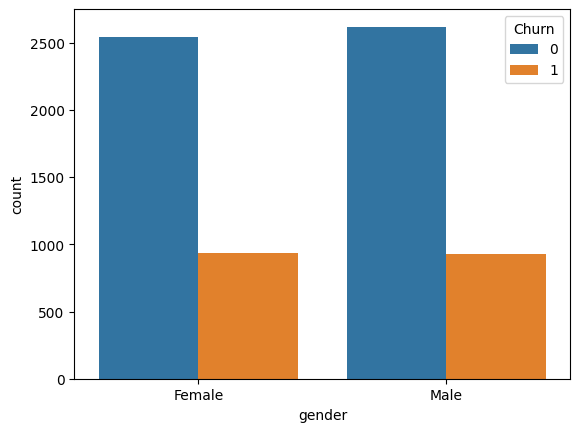

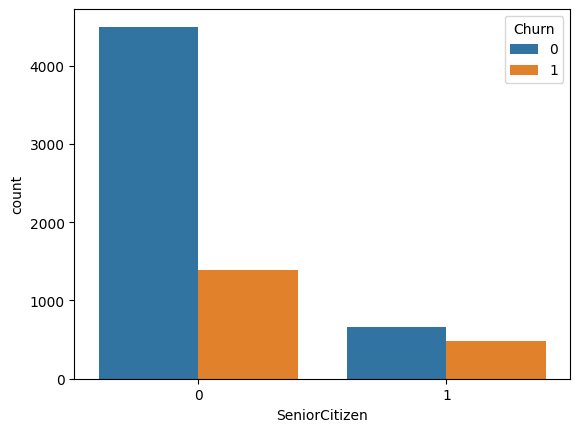

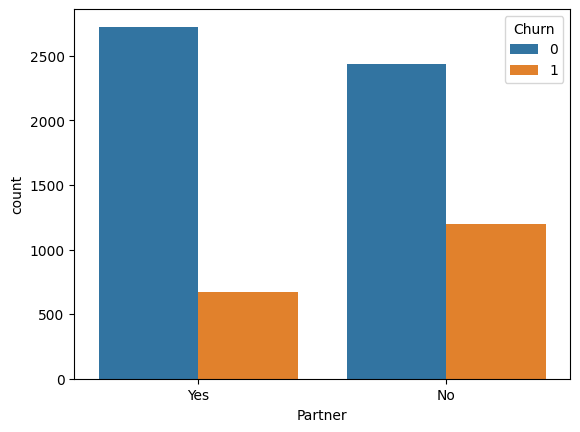

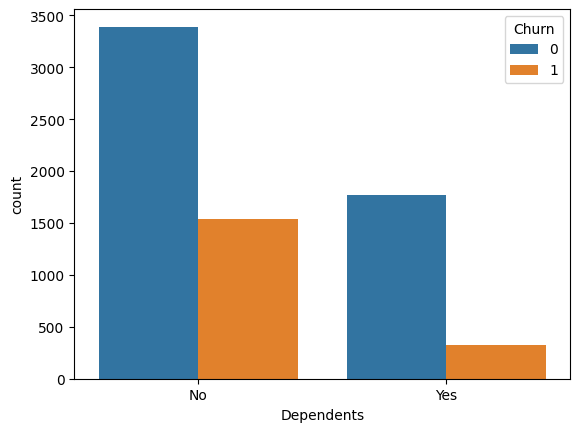

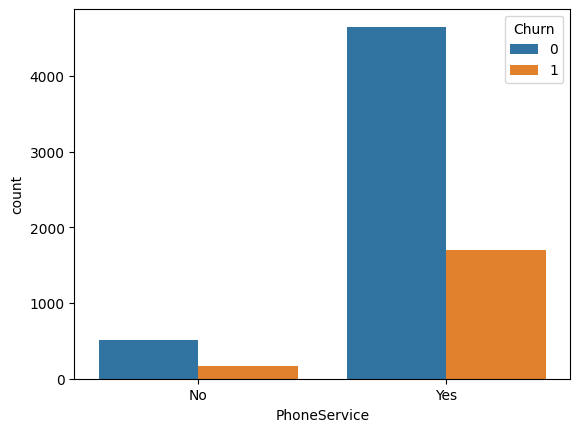

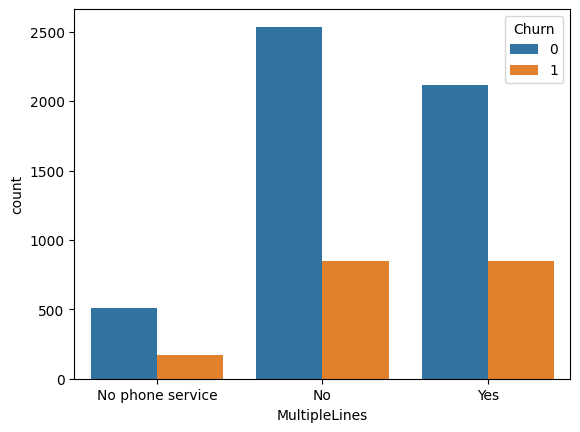

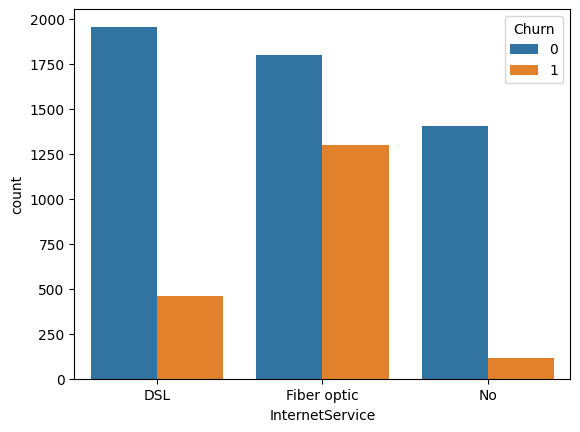

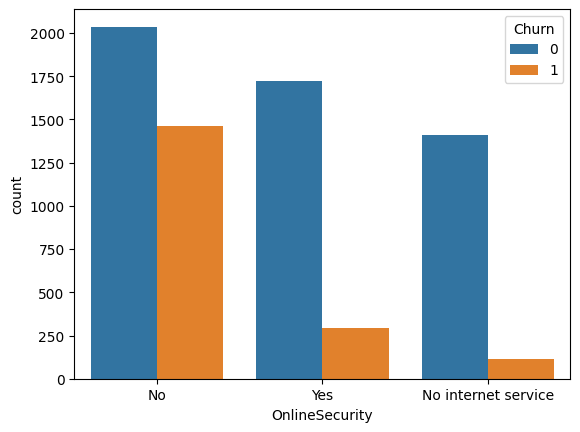

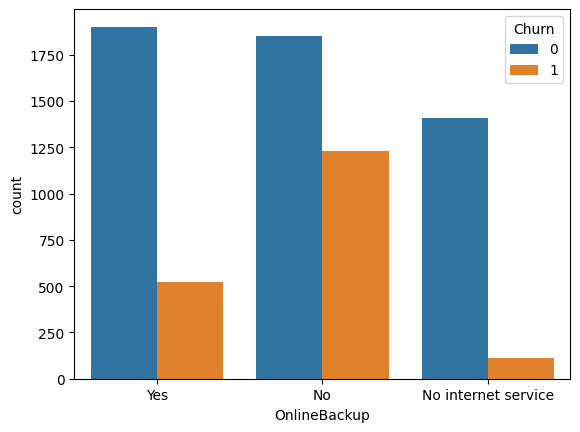

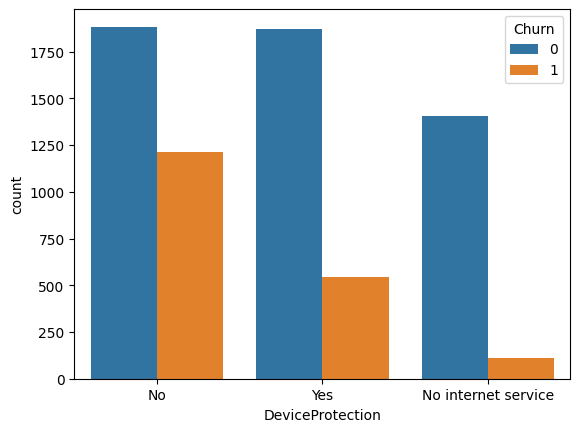

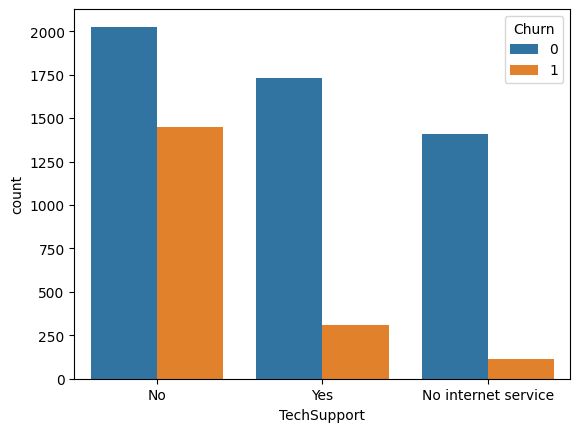

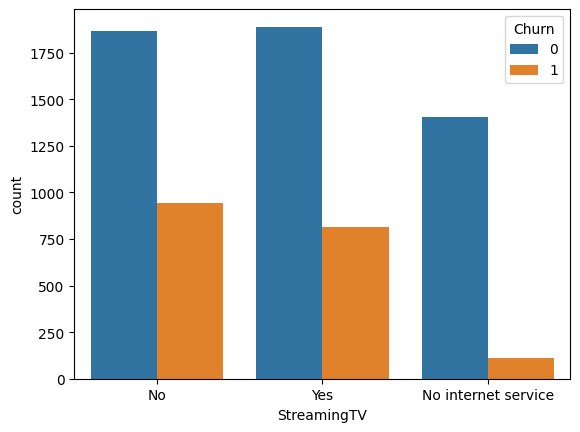

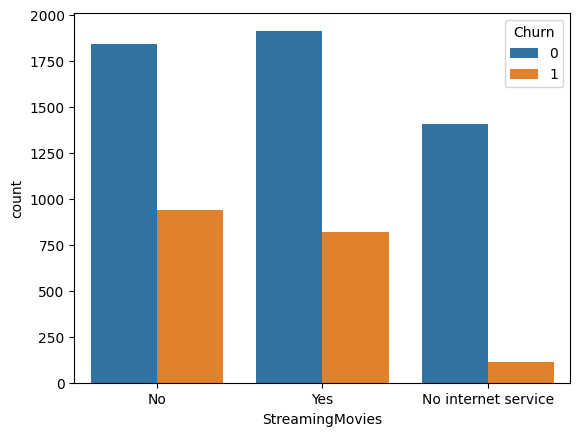

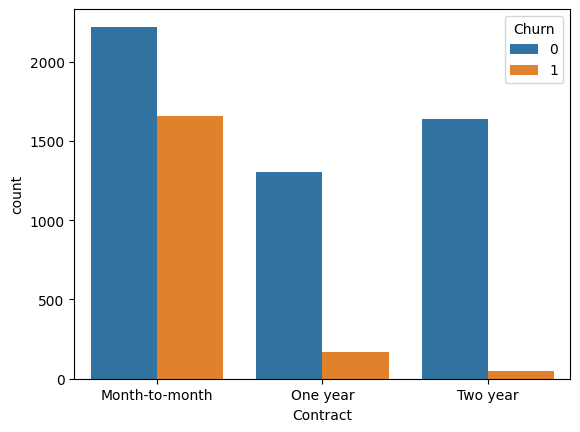

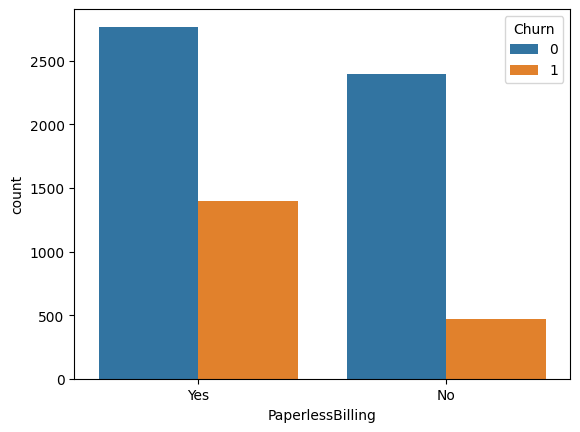

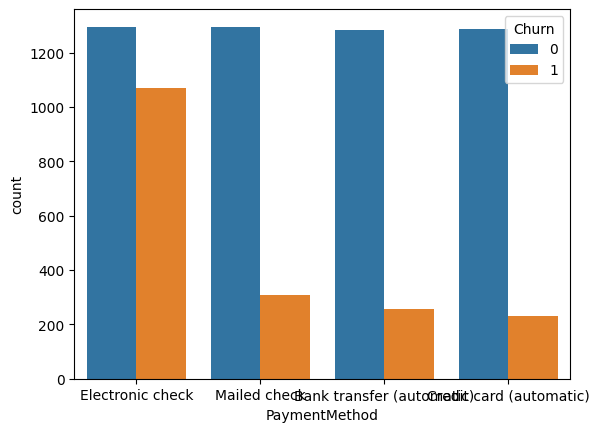

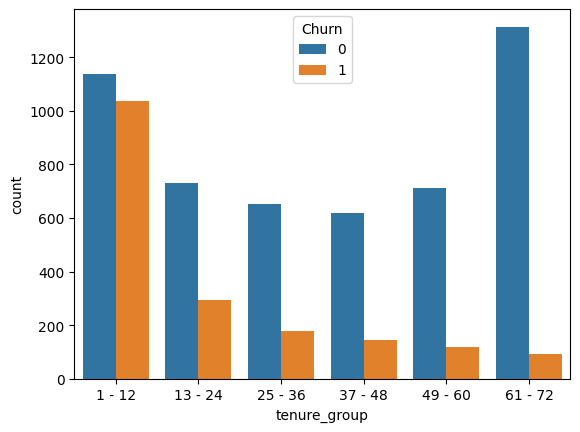

In [29]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor,hue='Churn')

Customers with short tenure are more likely to churn, suggesting early dissatisfaction with the service. Reducing churn in the **1–12 months** group should be a key focus area.

Customers using **automatic payment methods** (Bank Transfer and Credit Card) have the **lowest churn rates**, indicating higher loyalty.

From a business perspective, encouraging customers—especially those using **Electronic Checks**—to switch to **automatic payments** could help reduce churn.

**Chi-Square Test Insights:**

1. **Churn vs. Contract:** χ² = 1179.55, p-value 7.33 × 10⁻²⁵⁷ → Highly significant relationship, indicating that contract type strongly influences churn.
   
2. **Churn vs. InternetService:** χ² = 728.70, p-value 5.83 × 10⁻¹⁵⁹ → Significant relationship, suggesting that internet service type impacts churn likelihood.

3. **Churn vs. PaymentMethod:** χ² = 645.43, p-value 1.43 × 10⁻¹³⁹ → Significant association, implying that payment method affects customer retention.

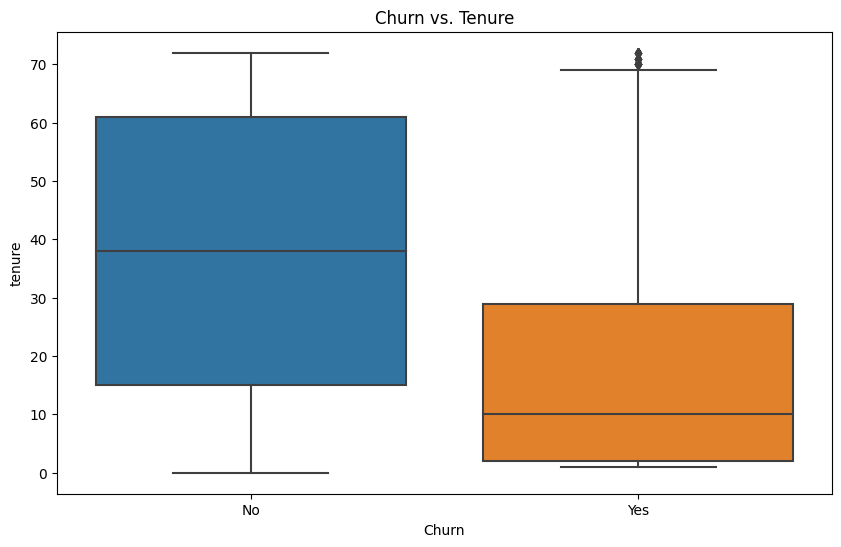

In [30]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=duplicate_data)
plt.title('Churn vs. Tenure')
plt.show()



**Tenure vs. Churn:** Customers who did not churn tend to have a longer tenure (higher median values) than those who churned, indicating that longer-tenured customers are less likely to leave

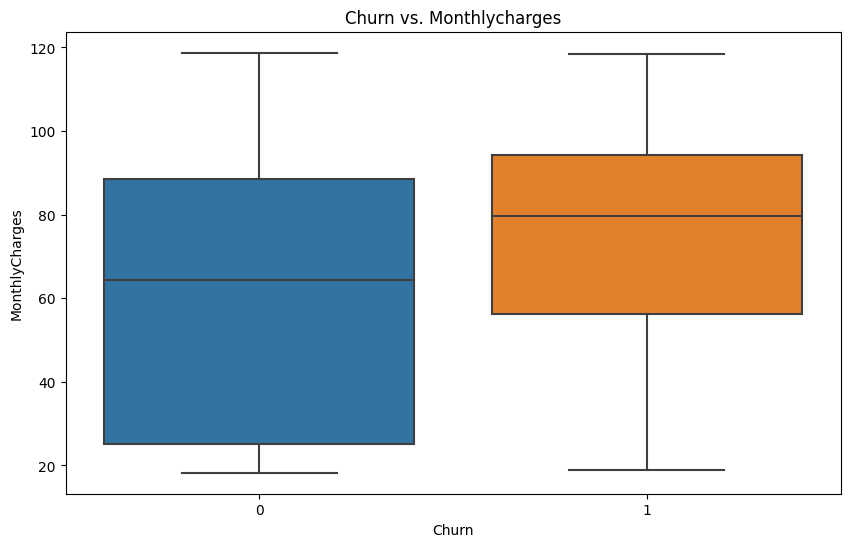

In [31]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Churn vs. Monthlycharges')
plt.show()



**Monthly Charges vs. Churn:** Customers who churn tend to have higher monthly charges on average than those who stay, suggesting that higher costs may contribute to increased churn rates.

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Churn'], data['Partner'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level



Chi-Square statistic: 157.50315146557506
P-value: 3.97379757451591e-36
Degrees of freedom: 1
Expected frequencies:
 [[2671.8084471 2491.1915529]
 [ 967.1915529  901.8084471]]


**Churn vs. Partner:** There is a significant association between having a partner and churn.

Customers **with a partner** have **lower churn**.
Customers **without a partner** have **higher churn**.

Since **p-value < alpha**, this relationship is statistically significant.

# CONCLUSION

**Key Insights from the Analysis:**

1. **Electronic check users** have the **highest churn rates**.
2. **Monthly contract customers** are more likely to churn due to **lack of commitment**.
3. Customers with **no online security or tech support** show **higher churn**.
4. **Non-senior citizens** tend to **churn more** than senior citizens.